<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [2]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [3]:
df = pd.read_csv('C:/Users/Дмитрий/Desktop/ML_VVSU/ds_salaries.csv')
del df['work_year'] 
df

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    3755 non-null   object
 1   employment_type     3755 non-null   object
 2   job_title           3755 non-null   object
 3   salary              3755 non-null   int64 
 4   salary_currency     3755 non-null   object
 5   salary_in_usd       3755 non-null   int64 
 6   employee_residence  3755 non-null   object
 7   remote_ratio        3755 non-null   int64 
 8   company_location    3755 non-null   object
 9   company_size        3755 non-null   object
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
df

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,80000,EUR,85847,26,100,ES,L
1,MI,CT,ML Engineer,30000,USD,30000,75,100,US,S
2,MI,CT,ML Engineer,25500,USD,25500,75,100,US,S
3,SE,FT,Data Scientist,175000,USD,175000,11,100,CA,M
4,SE,FT,Data Scientist,120000,USD,120000,11,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,412000,USD,412000,75,100,US,L
3751,MI,FT,Principal Data Scientist,151000,USD,151000,75,100,US,L
3752,EN,FT,Data Scientist,105000,USD,105000,75,100,US,S
3753,EN,CT,Business Data Analyst,100000,USD,100000,75,100,US,L


<Axes: >

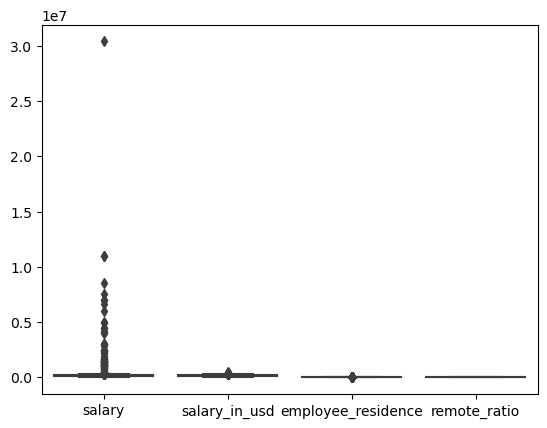

In [6]:
df_clust = df[['employee_residence','salary_in_usd']].copy()
sns.boxplot(df)# выбросов нет


In [7]:
df_clust.describe()

,employee_residence,salary_in_usd
count,3755.000000,3755.000000
mean,66.149401,137570.389880
std,19.235212,63055.625278
min,0.000000,5132.000000
25%,75.000000,95000.000000
50%,75.000000,135000.000000
75%,75.000000,175000.000000
max,77.000000,450000.000000


C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_15392\3959998740.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['employee_residence'], hist=True, kde=False,


<Axes: xlabel='employee_residence'>

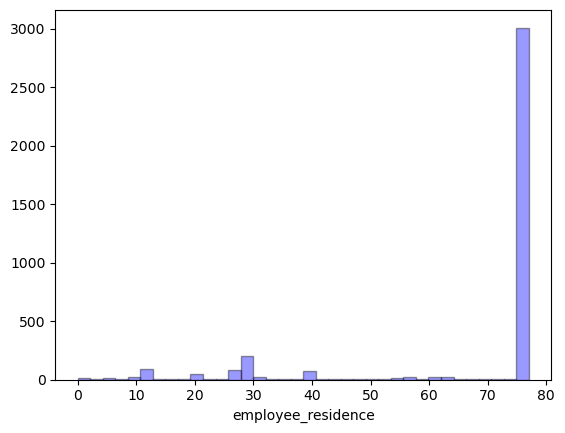

In [8]:
sns.distplot(df_clust['employee_residence'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_15392\3274830089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clust['salary_in_usd'], hist=True, kde=False,


<Axes: xlabel='salary_in_usd'>

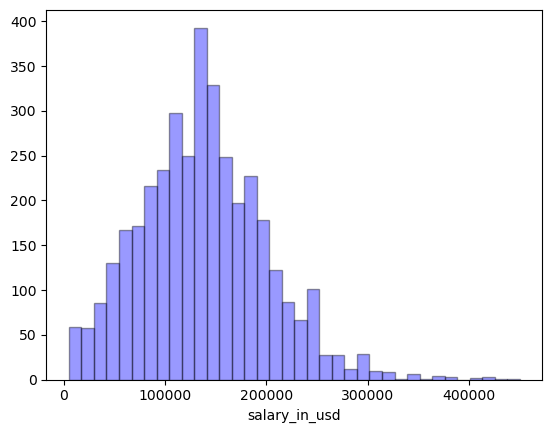

In [9]:
sns.distplot(df_clust['salary_in_usd'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [10]:
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_clust[['employee_residence','salary_in_usd']])
df_clust[['employee_residence','salary_in_usd']] = min_max_scal
df_clust.salary_in_usd.unique()

array([0.18143584, 0.05589973, 0.04578437, ..., 0.05223347, 0.9145814 ,
       0.20125745])

In [11]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski Harabasz Score 2, с баллом 11259.36998687334
Оптимальное число кластеров Silhouette Score 2, с баллом 0.7642030930979379
Оптимальное число кластеров Davies Bouldin Score 2, с баллом 0.38694901447382324


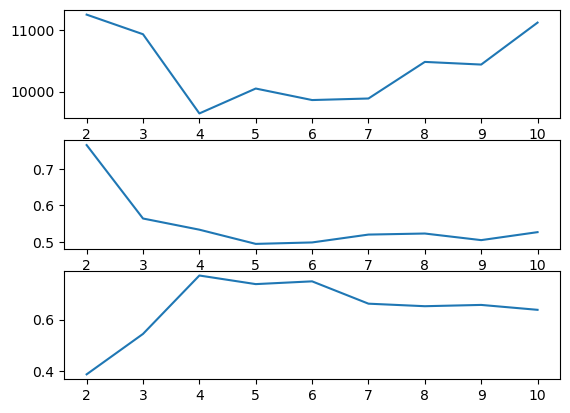

In [12]:
# your_code here
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(min_max_scal)
  score_1.append(calinski_harabasz_score(df_clust,kmeans.labels_))
  score_2.append(silhouette_score(df_clust,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_clust,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)
# plt.show()

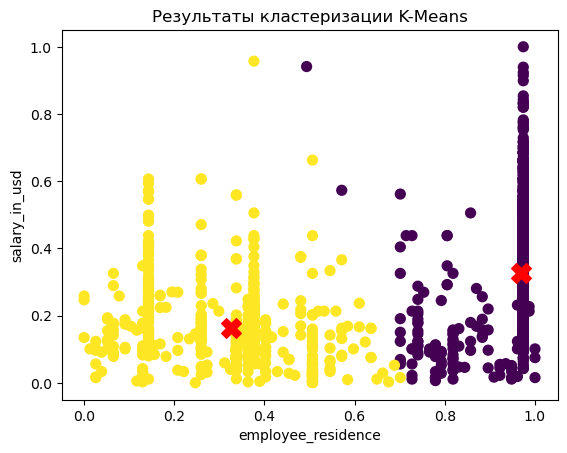

In [13]:
import numpy as np


kmeans = KMeans(n_clusters= 2,n_init = 10,random_state = 42)
kmeans.fit(min_max_scal)


cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
plt.scatter(df_clust['employee_residence'], df_clust['salary_in_usd'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('employee_residence')
plt.ylabel('salary_in_usd')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [14]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

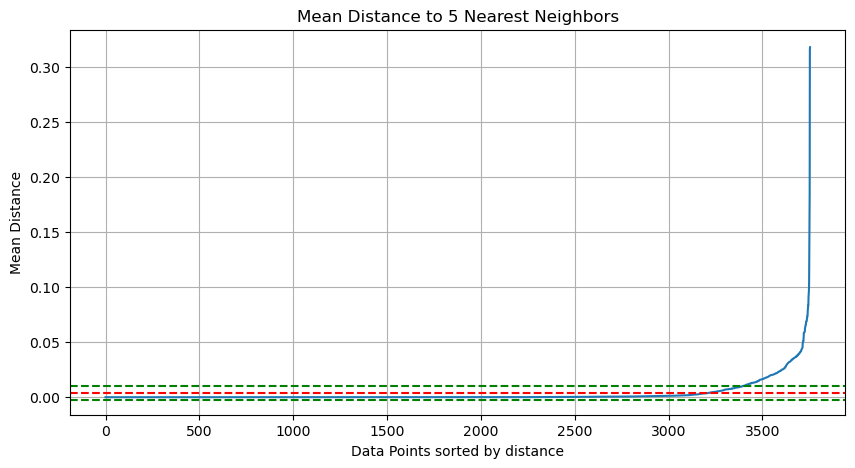

Оптимальный EPS = 0.003424453920922348


In [15]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')
#я подождал минут 5 и понял что это надолго поэтому данные eps буду брать как у вас в примере

In [16]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

[0]


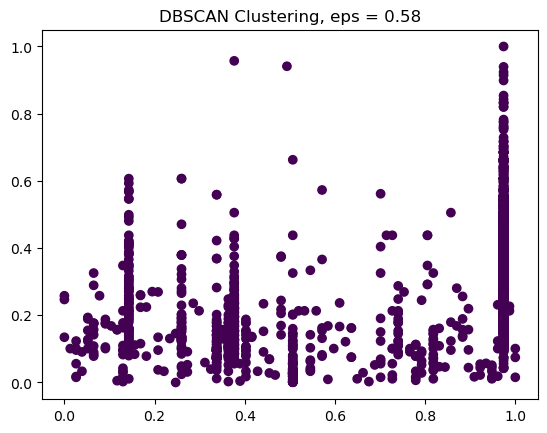

[0]


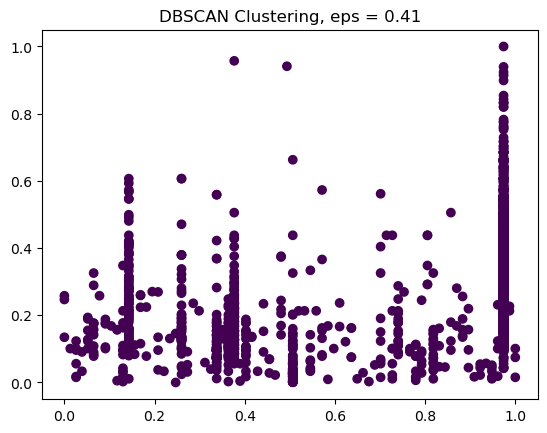

[-1  0]


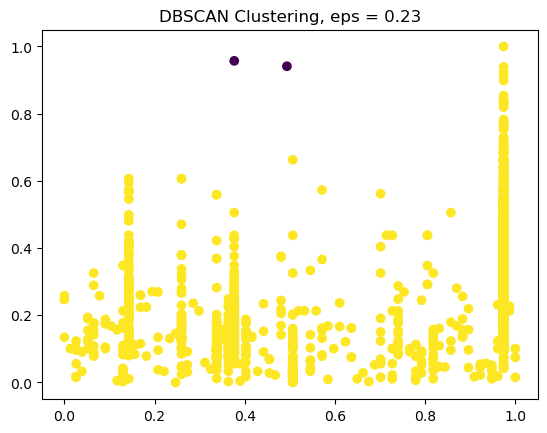

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31]


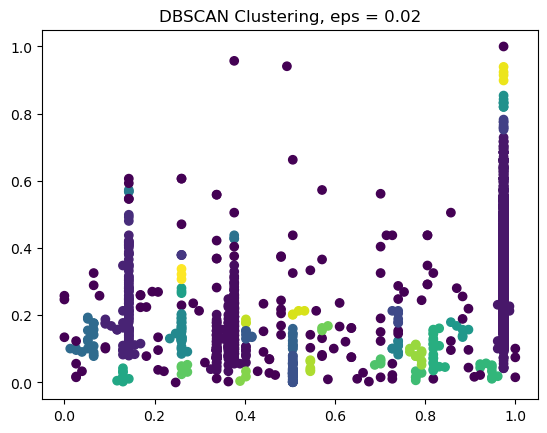

In [17]:
# your_code here
for eps in [0.58,0.41,0.23,0.02]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(min_max_scal)
  labels_db = dbscan.labels_
  print(np.unique(labels_db))
  # Визуализация результатов, темные точки - выбросы
  plt.scatter(df_clust['employee_residence'], df_clust['salary_in_usd'], c=labels_db, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [1]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()
     

NameError: name 'X' is not defined

In [18]:
"""
Здесь иерархическая кластеризация и метрики
"""
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [19]:
# your_code here
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k,linkage='average')

  clusters = cluster_model.fit(min_max_scal)

  score_2.append(silhouette_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")

Оптимальное число кластеров Silhouette Score 2, с баллом 0.7642030930979379


In [20]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

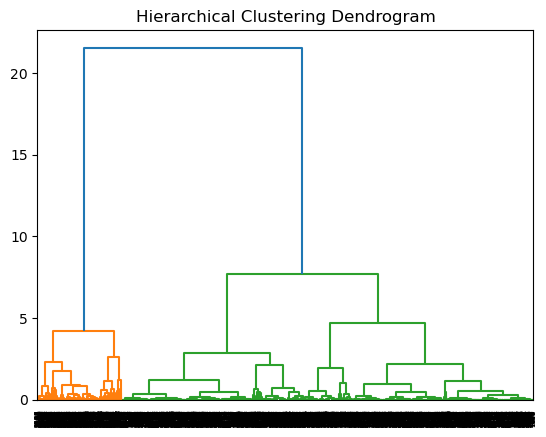

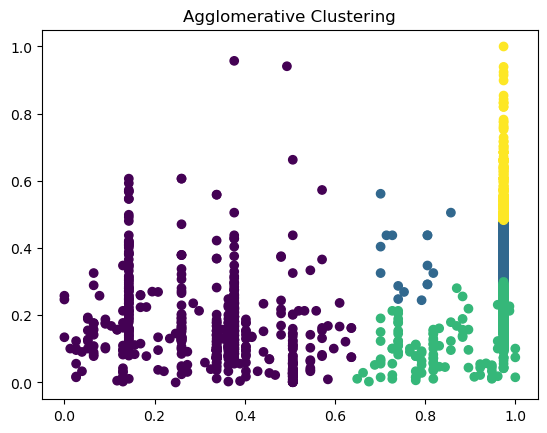

In [21]:
# your_code here

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(min_max_scal)
linkage_matrix = hierarchy.linkage(min_max_scal, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Визуализация результатов кластеризации
plt.scatter(df_clust['employee_residence'], df_clust['salary_in_usd'], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [22]:
!pip install ydata-profiling
!pip uninstall cast_control
!pip install cast_control==0.10.11

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Using cached cast_control-0.10.11-py2.py3-none-any.whl (33 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached daemons-1.3.2-py3-none-any.whl
  Using cached PyChromecast-9.2.0-py2.py3-none-any.whl (63 kB)
  Using cached pydbus-0.6.0-py2.py3-none-any.whl (19 kB)
  Using cached PyGObject-3.46.0.tar.gz (723 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached aiopath-0.6.11-py2.py3-none-any.whl (18 kB)
  Using cached mpris_server-0.2.18-py2.py3-none-any.whl (15 kB)
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Obtaining dependency information for protobuf>=3.0.0 from https://files.pythonhoste

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [41 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pygtkcompat
  copying pygtkcompat\generictreemodel.py -> build\lib.win-amd64-cpython-311\pygtkcompat
  copying pygtkcompat\pygtkcompat.py -> build\lib.win-amd64-cpython-311\pygtkcompat
  copying pygtkcompat\__init__.py -> build\lib.win-amd64-cpython-311\pygtkcompat
  creating build\lib.win-amd64-cpython-311\gi
  copying gi\docstring.py -> build\lib.win-amd64-cpython-311\gi
  copying gi\importer.py -> build\lib.win-amd64-cpython-311\gi
  copying gi\module.py -> build\lib.win-amd64-cpython-311\gi
  copying gi\pygtkcompat.py -> build\lib.win-amd64-cpython-311\gi
  copying gi\types.py -> build\lib.win-amd64-cpython-311\gi
  copying gi\_constants.py -> build\lib.win-amd64-cpython-311\gi
  copying gi\_error.py -> build\lib.win-amd64-cpython-311\gi
  copy

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [23]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

In [24]:
# your_code here
df['kmeans_cluster'] = cluster_labels
df['dbscan_cluster'] = labels_db
df

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,kmeans_cluster,dbscan_cluster
0,SE,FT,Principal Data Scientist,80000,EUR,85847,26,100,ES,L,1,0
1,MI,CT,ML Engineer,30000,USD,30000,75,100,US,S,0,1
2,MI,CT,ML Engineer,25500,USD,25500,75,100,US,S,0,1
3,SE,FT,Data Scientist,175000,USD,175000,11,100,CA,M,1,2
4,SE,FT,Data Scientist,120000,USD,120000,11,100,CA,M,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,412000,USD,412000,75,100,US,L,0,30
3751,MI,FT,Principal Data Scientist,151000,USD,151000,75,100,US,L,0,1
3752,EN,FT,Data Scientist,105000,USD,105000,75,100,US,S,0,1
3753,EN,CT,Business Data Analyst,100000,USD,100000,75,100,US,L,0,1


In [25]:

# from ydata_profiling import ProfileReport

uniq_labels_dbscan = tuple(set(cluster_labels))
uniq_labels_kmeans = tuple(set(labels_db))
print(uniq_labels_dbscan,uniq_labels_kmeans)

(0, 1) (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, -1)


In [26]:
df_db_0 = df[df.dbscan_cluster == 0]
df_db_1 = df[df.dbscan_cluster == 1]
df_db_2 = df[df.dbscan_cluster == 2]
df_db_3 = df[df.dbscan_cluster == 3]
df_db_4 = df[df.dbscan_cluster == 4]
df_db_5 = df[df.dbscan_cluster == 5]
df_db_6 = df[df.dbscan_cluster == 6]
df_db_7 = df[df.dbscan_cluster == 7]

df_kmeans_0 = df[df.kmeans_cluster == 0]
df_kmeans_1 = df[df.kmeans_cluster == 1]
df_kmeans_2 = df[df.kmeans_cluster == 2]
df_kmeans_3 = df[df.kmeans_cluster == 3]

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

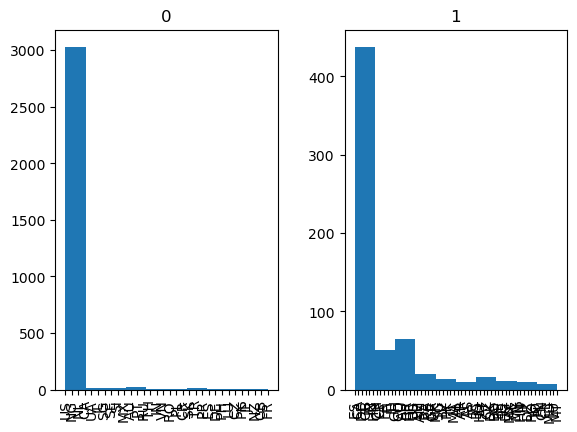

In [31]:

df.hist('company_location', by='kmeans_cluster')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

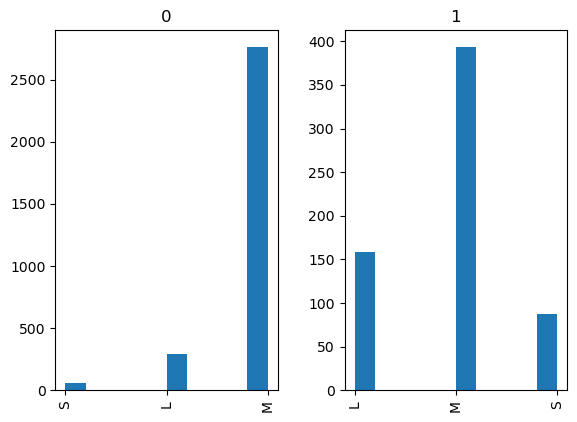

In [32]:
df.hist('company_size', by='kmeans_cluster')

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>],
       [<Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>, <Axes: title={'center': '20'}>,
        <Axes: title={'center': '21'}>, <Axes: title={'center': '22'}>],
       [<Axes: title={'center': '23'}>, <Axes: title={'center': '24'}>,
        <Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>

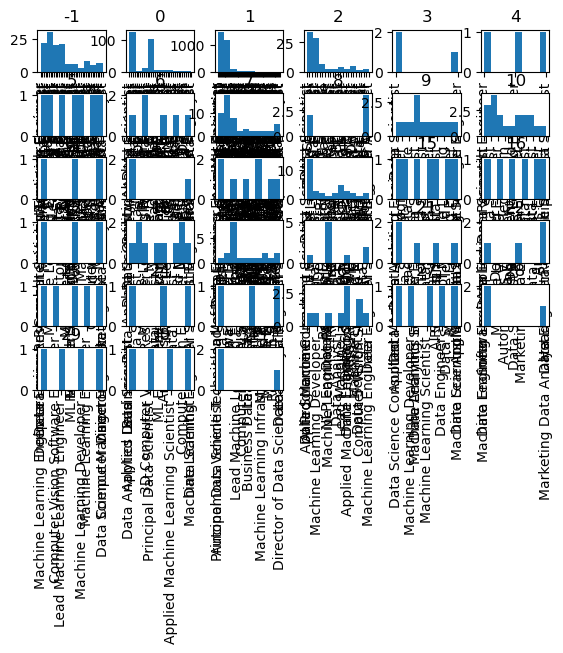

In [34]:
df.hist('job_title', by='dbscan_cluster')